# Goal: Work with group on the Regression Modeling of the Baseball Players dataset 

* Will divide the class into the groups, the best way is to randomly divide the group
* Each group will work on the problem together
* I will join the groups and answer the questions from time to time
* Once you guys complete the work, each of the group will present the findings to the class

## Baseball Players dataset description





#### Major League Baseball Data from the 1986 and 1987 seasons.
** A data frame with 322 observations of major league players on the following 20 variables **

* AtBat: Number of times at bat in 1986
* Hits: Number of hits in 1986
* HmRun: Number of home runs in 1986
* Runs: Number of runs in 1986
* RBI: Number of runs batted in in 1986
* Walks: Number of walks in 1986
* Years: Number of years in the major leagues
* CAtBat: Number of times at bat during his career
* CHits: Number of hits during his career
* CHmRun: Number of home runs during his career
* CRuns: Number of runs during his career
* CRBI: Number of runs batted in during his career
* Walks: Number of walks during his career
* League: A factor with levels A and N indicating player's league at the end of 1986
* Division: A factor with levels E and W indicating player's division at the end of 1986
* PutOuts: Number of put outs in 1986
* Assists: Number of assists in 1986
* Errors: Number of errors in 1986
* Salary: 1987 annual salary on opening day in thousands of dollars
* NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987
	
		
		






		
		
		

		

		

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import RidgeCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('ggplot') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))#older version do not support the mean_absolute_percentage_error

The scikit-learn version is 1.3.0.


In [4]:
# If your sklearn package is old, use the folling line of code to upgrade the sklearn package
# !pip install -U scikit-learn

## Read the data 

In [5]:
df_Hi = pd.read_csv('Dataset/BaseballPlayersData.csv')
df_Hi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
df_Hi.describe()

AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean   380.928571  101.024845   10.770186   50.909938   48.027950   38.742236   
std    153.404981   46.454741    8.709037   26.024095   26.166895   21.639327   
min     16.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    255.250000   64.000000    4.000000   30.250000   28.000000   22.000000   
50%    379.500000   96.000000    8.000000   48.000000   44.000000   35.000000   
75%    512.000000  137.000000   16.000000   69.000000   64.750000   53.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years       CAtBat        CHits      CHmRun        CRuns  \
count  322.000000    322.00000   322.000000  322.000000   322.000000   
mean     7.444099   2648.68323   717.571429   69.490683   358.795031   
std      4.926087   2324.20587   654.472627   86.266061   334.105886   
min      1.000000     19.00000     4.000000    0.000000     1.000000   
25%      4.000000    816.75000   209.000000   14.000000   100.250000   
50%      6.000000   1928.00000   508.000000   37.500000   247.000000   
75%     11.000000   3924.25000  1059.250000   90.000000   526.250000   
max     24.000000  14053.00000  4256.000000  548.000000  2165.000000   

              CRBI       CWalks      PutOuts     Assists      Errors  \
count   322.000000   322.000000   322.000000  322.000000  322.000000   
mean    330.118012   260.239130   288.937888  106.913043    8.040373   
std     333.219617   267.058085   280.704614  136.854876    6.368359   
min       0.000000     0.000000     0.000000    0.000000    0.000000   
25%      88.750000    67.250000   109.250000    7.000000    3.000000   
50%     220.500000   170.500000   212.000000   39.500000    6.000000   
75%     426.250000   339.250000   325.000000  166.000000   11.000000   
max    1659.000000  1566.000000  1378.000000  492.000000   32.000000   

            Salary  
count   322.000000  
mean    529.599284  
std     433.014112  
min      67.500000  
25%     193.897891  
50%     430.750000  
75%     750.000000  
max    2460.000000

In [7]:
df_Hi.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    315    81      7    24   38     39     14    3449    835      69    321   
1    479   130     18    66   72     76      3    1624    457      63    224   
2    496   141     20    65   78     37     11    5628   1575     225    828   
3    321    87     10    39   42     30      2     396    101      12     48   
4    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0   414     375      N        W      632       43      10   475.0         N  
1   266     263      A        W      880       82      14   480.0         A  
2   838     354      N        E      200       11       3   500.0         N  
3    46      33      N        E      805       40       4    91.5         N  
4   336     194      A        W      282      421      25   750.0         A

## Day 1 Task

Step 1

* Explore the data, and visualize the data from multiple avenues
* Change the categorical variables to the numerical variables using appropriate method
* You may want to do some feature engineering to create the meaningful predictors
* Create the 80/20 train test split and then standardize the data
* Run the Simple linear regression for each predictor with the Salary being the target variable
* Explain the relationship of each individual predictor with the target variable
* Write the simple linear regression equation
* Discuss which variable is most significant predictor of the players salary?
* Explore the various accuracy measures such as MAPE, RMSE, R^2. What do those values mean in terms of your problem? Explain.
* Perform multiple linear regression taking three predictors that you observe most relevant for predicting salary.
* Discuss your observations.
* Provide a summary of the result.



* Plan for the 1-2 minutes informal presentation of your findings to the class.

Note: At the end of the session, each group will present the findings to the class and email single main copy of their notebook representing groups overall  achievement

In [8]:
League_Dummies = pd.get_dummies(df_Hi['League'])
Division_Dummies = pd.get_dummies(df_Hi['Division'])
New_League_Dummies = pd.get_dummies(df_Hi['NewLeague'])

In [9]:
pd_dummies = pd.get_dummies(df_Hi)
pd_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  PutOuts      322 non-null    int64  
 14  Assists      322 non-null    int64  
 15  Errors       322 non-null    int64  
 16  Salary       322 non-null    float64
 17  League_A     322 non-null    uint8  
 18  League_N     322 non-null    uint8  
 19  Division

In [10]:

pd_all = pd.concat([df_Hi, pd_dummies], axis=1)
pd_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        322 non-null    int64  
 1   Hits         322 non-null    int64  
 2   HmRun        322 non-null    int64  
 3   Runs         322 non-null    int64  
 4   RBI          322 non-null    int64  
 5   Walks        322 non-null    int64  
 6   Years        322 non-null    int64  
 7   CAtBat       322 non-null    int64  
 8   CHits        322 non-null    int64  
 9   CHmRun       322 non-null    int64  
 10  CRuns        322 non-null    int64  
 11  CRBI         322 non-null    int64  
 12  CWalks       322 non-null    int64  
 13  League       322 non-null    object 
 14  Division     322 non-null    object 
 15  PutOuts      322 non-null    int64  
 16  Assists      322 non-null    int64  
 17  Errors       322 non-null    int64  
 18  Salary       322 non-null    float64
 19  NewLeagu

In [11]:
# keep features only for X
X = df_Hi.drop('Salary', axis = 1)

# keep target variable only for y
Y = df_Hi['Salary'] 

# split the train test, here we are doing 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Missing Values

In [12]:
# Count the number of missing values in each column
print(df_Hi.isnull().sum())

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64


Histogram for numerical variables

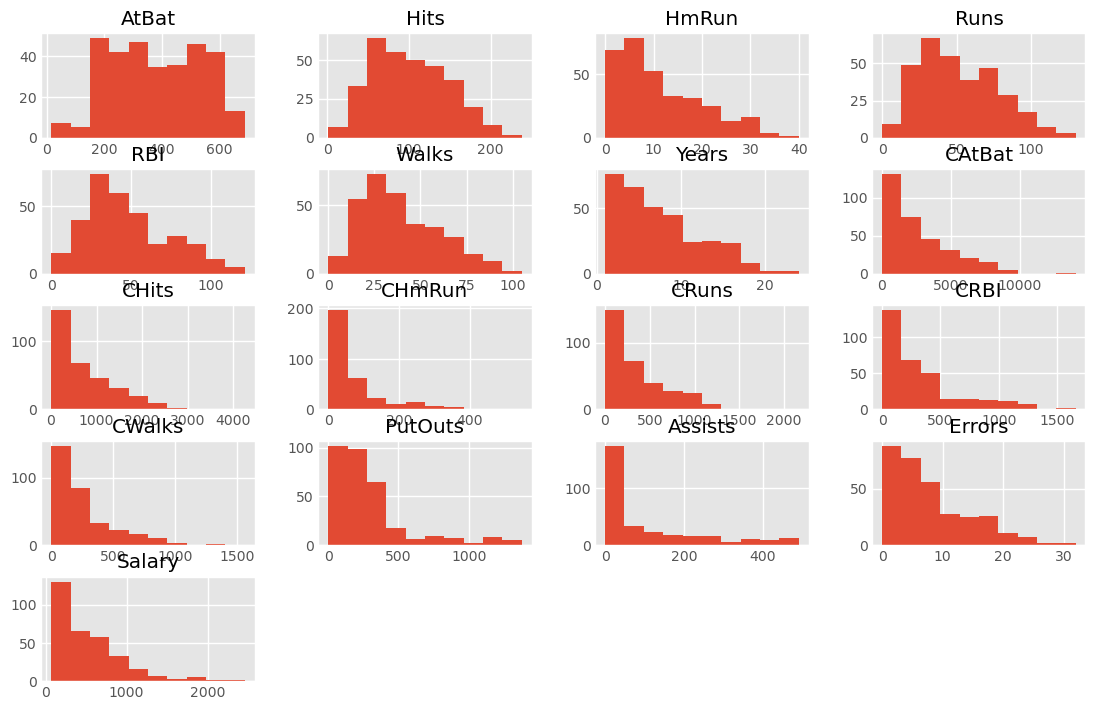

In [13]:
df_Hi.hist(figsize=(12, 8))
plt.show()


Count Plots for Categorical Variables

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='categorical_column', data=df_Hi)
plt.show()

ValueError: Could not interpret input 'categorical_column'

<Figure size 1000x600 with 0 Axes>

create the meaningful predictors

In [15]:
med_sal = df_Hi['Salary'].median()
med_sal
df_Hi['Abov_Med_Salary'] = df_Hi['Salary'].apply(lambda x: 1 if x > med_sal else 0)

df_Hi.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
0      315    81      7    24   38     39     14    3449    835      69   
1      479   130     18    66   72     76      3    1624    457      63   
2      496   141     20    65   78     37     11    5628   1575     225   
3      321    87     10    39   42     30      2     396    101      12   
4      594   169      4    74   51     35     11    4408   1133      19   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...   
317    289    63      7    36   41     44     17    7402   1954     195   
318    181    46      1    19   18     17      5     937    238       9   
319    200    51      2    14   29     25     23    9778   2732     379   
320    580   194      9    91   62     78      8    3372   1028      48   
321    221    53      2    21   23     22      8    1063    283      15   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  \
0      321   414     375      N        W      632       43      10   
1      224   266     263      A        W      880       82      14   
2      828   838     354      N        E      200       11       3   
3       48    46      33      N        E      805       40       4   
4      501   336     194      A        W      282      421      25   
..     ...   ...     ...    ...      ...      ...      ...     ...   
317   1115   919    1153      A        W      166      211       7   
318     88    95     104      A        E       37       98       9   
319   1272  1652     925      N        W      398       29       7   
320    604   314     469      N        E      270       13       6   
321    107   124     106      N        E      325       58       6   

          Salary NewLeague  Abov_Med_Salary  
0     475.000000         N                1  
1     480.000000         A                1  
2     500.000000         N                1  
3      91.500000         N                0  
4     750.000000         A                1  
..           ...       ...              ...  
317   575.062496         A                1  
318   233.334533         A                0  
319   642.812234         N                1  
320  1027.634790         N                1  
321   285.547199         N                0  

[322 rows x 21 columns]